In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings 
warnings.filterwarnings( "ignore")

In [2]:
df = pd.read_excel(r"C:\Users\ragha\OneDrive\Desktop\Great Learning\GL Practice files\Machine Learning\Project_Speech.xlsx")

In [3]:
df.head()

,Name,Speech
0,Roosevelt,On each national day of inauguration since 178...
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [4]:
# Problem 2.1 -  Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

In [5]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

In [6]:
df_speeches = df.copy()

In [7]:
# Tokenizing words and sentences using Python's string functions
df_speeches['Words'] = df_speeches['Speech'].apply(lambda x: x.split())
df_speeches['Sentences'] = df_speeches['Speech'].apply(lambda x: x.split('.'))

# Calculate number of characters, words, and sentences for each speech
df_speeches['Num_Characters'] = df_speeches['Speech'].apply(len)
df_speeches['Num_Words'] = df_speeches['Words'].apply(len)
df_speeches['Num_Sentences'] = df_speeches['Sentences'].apply(len)

# Extracting the relevant columns for display
df_counts = df_speeches[['Name', 'Num_Characters', 'Num_Words', 'Num_Sentences']]
df_counts

,Name,Num_Characters,Num_Words,Num_Sentences
0,Roosevelt,7651,1323,69
1,Kennedy,7673,1364,56
2,Nixon,10106,1769,70


In [8]:
# Problem 02 -Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

In [9]:
common_stopwords = {
    "ourselves", "hers", "between", "yourself", "but", 
    "again", "there", "about", "once", "during", "out", 
    "very", "having", "with", "they", "own", "an", "be", 
    "some", "for", "do", "its", "yours", "such", "into", 
    "of", "most", "itself", "other", "off", "is", "s", "am", 
    "or", "who", "as", "from", "him", "each", "the", "themselves", 
    "until", "below", "are", "we", "these", "your", "his", "through", 
    "don", "nor", "me", "were", "her", "more", "himself", "this", 
    "down", "should", "our", "their", "while", "above", "both", 
    "up", "to", "ours", "had", "she", "all", "no", "when", "at", 
    "any", "before", "them", "same", "and", "been", "have", "in", 
    "will", "on", "does", "yourselves", "then", "that", "because", 
    "what", "over", "why", "so", "can", "did", "not", "now", 
    "under", "he", "you", "herself", "has", "just", "where", 
    "too", "only", "myself", "which", "those", "i", 
    "after", "few", "whom", "t", "being", "if", "theirs", 
    "my", "against", "a", "by", "doing", "it", "how", "further", 
    "was", "here", "than"
}

In [10]:
def remove_common_stopwords(words):
    return [word for word in words if word.lower() not in common_stopwords]

# Assuming 'Words' column is in df_speeches, as shown in the previous code
df_speeches['Words_No_Stop'] = df_speeches['Words'].apply(remove_common_stopwords)
df_speeches['Num_Words_No_Stop'] = df_speeches['Words_No_Stop'].apply(len)

df_word_counts = df_speeches[['Name', 'Num_Words', 'Num_Words_No_Stop']]
df_word_counts

,Name,Num_Words,Num_Words_No_Stop
0,Roosevelt,1323,662
1,Kennedy,1364,723
2,Nixon,1769,843


In [11]:
# Function to remove stopwords from a sentence
def remove_stopwords_from_sentence(sentence):
    return ' '.join(remove_common_stopwords(sentence.split()))

# Removing stopwords from the first sentence of each speech
sample_sentences = df_speeches['Sentences'].apply(lambda x: remove_stopwords_from_sentence(x[0]))

sample_sentences_df = pd.DataFrame({
    'Name': df_speeches['Name'],
    'Sample_Sentence': sample_sentences
})

sample_sentences_df

,Name,Sample_Sentence
0,Roosevelt,"national day inauguration since 1789, people r..."
1,Kennedy,"Vice President Johnson, Mr"
2,Nixon,Mr


In [12]:
# Problem 2.3 - Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [13]:
from collections import Counter

# Function to get top N words from a list of words
def get_top_n_words(words, n=3):
    count = Counter(words)
    return count.most_common(n)

# Get top 3 words for each president
df_speeches['Top_3_Words'] = df_speeches['Words_No_Stop'].apply(get_top_n_words)

# Extracting the relevant columns for display
df_top_words = df_speeches[['Name', 'Top_3_Words']]
df_top_words

,Name,Top_3_Words
0,Roosevelt,"[(--, 22), (know, 9), (us, 8)]"
1,Kennedy,"[(--, 24), (us, 11), (let, 8)]"
2,Nixon,"[(us, 25), (--, 17), (new, 15)]"


In [14]:
# Problem 2.4 -Plot the word cloud of each of the three speeches. (after removing the stopwords)

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

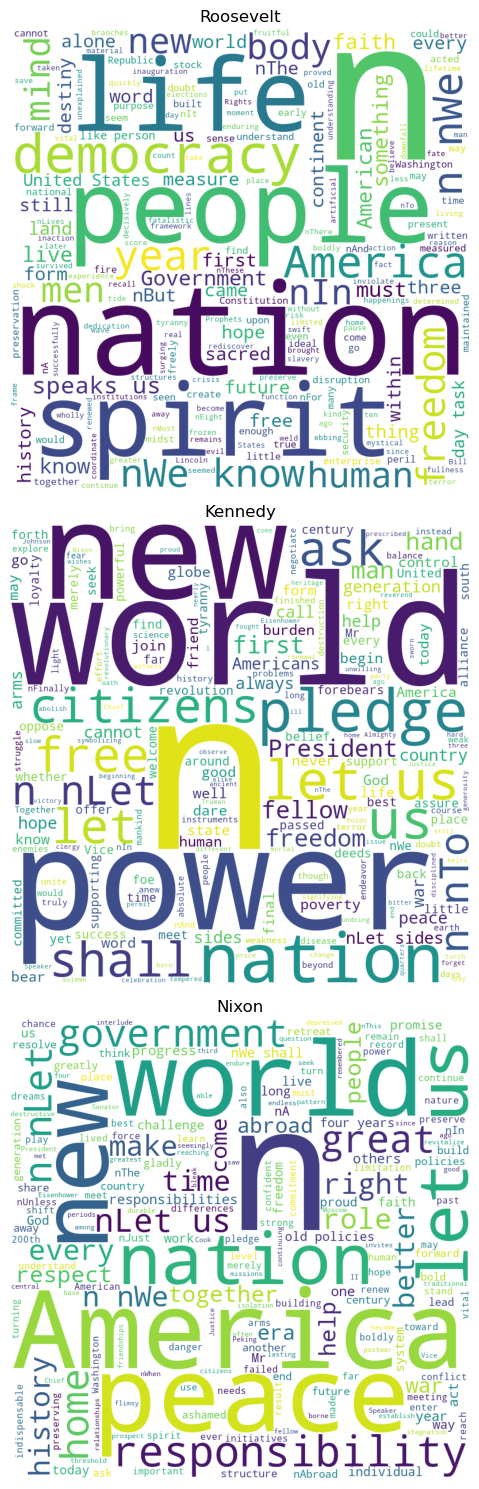

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

for i, row in df_speeches.iterrows():
    wordcloud = WordCloud(width = 800, height = 800, 
                          background_color ='white', 
                          stopwords = common_stopwords, 
                          min_font_size = 10).generate(' '.join(row['Words_No_Stop']))
    
    axes[i].imshow(wordcloud)
    axes[i].set_title(row['Name'])
    axes[i].axis("off")

plt.tight_layout()
plt.show()

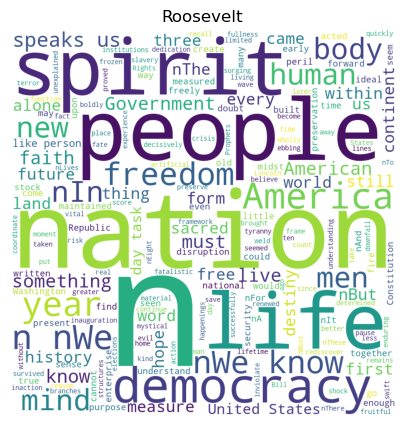

In [17]:
row = df_speeches.iloc[0]
wordcloud = WordCloud(width=800, height=800, 
                      background_color='white', 
                      stopwords=common_stopwords, 
                      min_font_size=10).generate(' '.join(row['Words_No_Stop']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.title(row['Name'])
plt.axis("off")
plt.show()

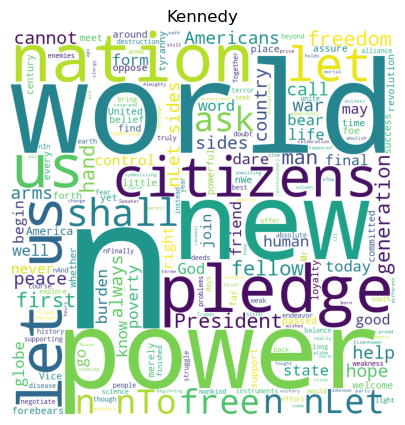

In [18]:
row = df_speeches.iloc[1]
wordcloud = WordCloud(width=800, height=800, 
                      background_color='white', 
                      stopwords=common_stopwords, 
                      min_font_size=10).generate(' '.join(row['Words_No_Stop']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.title(row['Name'])
plt.axis("off")
plt.show()

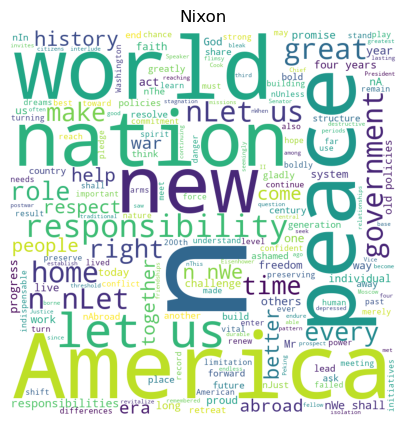

In [19]:
row = df_speeches.iloc[2]
wordcloud = WordCloud(width=800, height=800, 
                      background_color='white', 
                      stopwords=common_stopwords, 
                      min_font_size=10).generate(' '.join(row['Words_No_Stop']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.title(row['Name'])
plt.axis("off")
plt.show()